In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('ggplot')

# Будет использоваться набор данных под названием diabetes из библиотеки scikit
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346


In [12]:
# Сначала мы создадим объект класса StandardScaler,
# затем используем его для подгонки к нашей матрице данных и преобразуем данные
# В результате мы получим двумерный массив NutPy
scaler = StandardScaler()
scaler.fit(df)
Diabetes_scaled = scaler.transform(df)

# Мы можем преобразовать его в фрейм данных pandas.
dataframe_scaled = pd.DataFrame(data=Diabetes_scaled, columns=diabetes.feature_names)
dataframe_scaled.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
5,-1.948811,-0.938537,-0.855583,-0.408741,-1.450445,-1.666931,0.867796,-1.606102,-0.865679,-2.025562


In [13]:
# Запустим наш PCA для десяти компонентов!
pca = PCA(n_components=10)
pca.fit_transform(Diabetes_scaled)

array([[ 0.58719913, -1.9468322 ,  0.58920548, ..., -0.75743079,
        -0.18107537, -0.04895286],
       [-2.83162538,  1.37208173,  0.02792987, ...,  0.18843634,
         0.50512797,  0.04359861],
       [ 0.27212855, -1.63490124,  0.73924374, ..., -0.84320298,
        -0.02535322, -0.05417517],
       ...,
       [-0.20520638, -1.20548723,  0.4961862 , ...,  0.49184884,
        -0.1132205 ,  0.05887482],
       [ 0.69287112,  0.2101271 , -0.86872416, ..., -0.07868363,
        -0.12721141, -0.04554011],
       [-1.90394067,  3.97577657, -0.04833791, ..., -1.18535938,
         0.73047454, -0.15455768]], shape=(442, 10))

In [14]:
# Как только мы выполним наш PCA, мы можем извлечь объясненную долю дисперсии и
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
print(prop_var, eigenvalues, sep = '\n')

[0.40242108 0.14923197 0.12059663 0.09554764 0.06621814 0.06027171
 0.05365657 0.0433682  0.007832   0.00085607]
[4.03333594 1.49570362 1.20870088 0.95764302 0.66368294 0.60408378
 0.53778235 0.43466544 0.07849762 0.00858014]


In [15]:
pca = PCA(n_components=2)
PC = pca.fit_transform(Diabetes_scaled)

pca_diabetes = pd.DataFrame(data = PC,
                            columns = ['PC1', 'PC2'])
pca_diabetes.head(6)

,PC1,PC2
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960
5,-3.966321,-0.381060


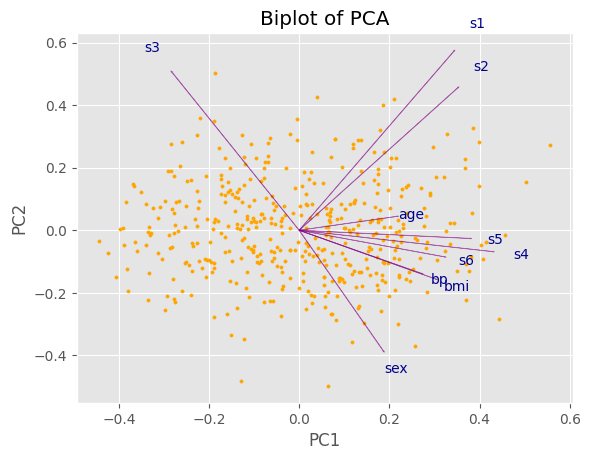

<Figure size 640x480 with 0 Axes>

In [16]:
# Способ визуализации данных на 2D модель
def biplot(score,coef,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5,
                color='orange')
    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15,
                 coef[i,1] * 1.15,
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.figure()
    
plt.title('Biplot of PCA')
biplot(PC,
       np.transpose(pca.components_),
       list(diabetes.feature_names))